### 常见网络模型

#### torchvision.models 模块
torchvision.models 模块中包含了常见网络模型结构的定义，这些网络模型可以解决以下四大类问题：图像分类、图像分割、物体检测和视频分类。

#### 实例化一个 GoogLeNet 网络

In [1]:
import torchvision.models as models

googlenet = models.googlenet(pretrained=True)

c:\Envs\transformers\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Envs\transformers\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to C:\Users\Jone/.cache\torch\hub\checkpoints\googlenet-1378be20.pth
100%|██████████| 49.7M/49.7M [01:08<00:00, 761kB/s] 


#### 模型微调

In [5]:
import torch
import torchvision.models as models
from torchvision.models import googlenet, GoogLeNet_Weights

# 加载预训练模型
googlenet = googlenet(weights=GoogLeNet_Weights.IMAGENET1K_V1)

# 提取分类层的输入参数
fc_in_features = googlenet.fc.in_features
print(f'fc_in_futures: {fc_in_features}')

# 查看分类层的输出参数
fc_out_features = googlenet.fc.out_features
print(f'fc_out_futures: {fc_out_features}')

# 修改预训练模型的输出分类数
googlenet.fc = torch.nn.Linear(fc_in_features, 10)

fc_in_futures: 1024
fc_out_futures: 1000


#### 其他常用函数

##### make_grid
torchvision.utils.make_grid(tensor, nrow=8, padding=2) 
- tensor：类型是 Tensor 或列表，如果输入类型是 Tensor，其形状应是 (B x C x H x W)；如果输入类型是列表，列表中元素应为相同大小的图片。
- nrow：表示一行放入的图片数量，默认为 8。
- padding：子图像与子图像之间的边框宽度，默认为 2 像素。

In [6]:
import torchvision
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader

# 加载 MNIST 数据集
mnist_dataset = datasets.MNIST('./data',
                               train=False,
                               transform=transforms.ToTensor(),
                               target_transform=None,
                               download=True)

# 取32张图片的tensor
tensor_dataloader = DataLoader(dataset=mnist_dataset,
                               batch_size=32)

data_iter = iter(tensor_dataloader)
img_tensor, label_tensor = next(data_iter)
print(img_tensor.shape)

torch.Size([32, 1, 28, 28])


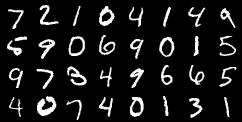

In [7]:
# 将32张图片拼接在一个网格中
grid_tensor = torchvision.utils.make_grid(img_tensor, nrow=8, padding=2)
grid_img = transforms.ToPILImage()(grid_tensor)
display(grid_img)

##### save_img
torchvision.utils.save_image(tensor, fp, **kwargs)
- tensor：类型是 Tensor 或列表，如果输入类型是 Tensor，直接将 Tensor 保存；如果输入类型是列表，则先调用 make_grid 函数生成一张图片的 Tensor，然后再保存。
- fp：保存图片的文件名；
- **kwargs：make_grid 函数中的参数，前面已经讲过了。

In [8]:
# 输入为一张图片的tensor 直接保存
torchvision.utils.save_image(grid_tensor, 'grid.jpg')

# 输入为List 调用grid_img函数后保存
torchvision.utils.save_image(img_tensor,'grid2.jpg', nrow=5, padding=2)